CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In [ ]:
!pip install 

In [5]:

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [6]:
# loading the dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

There are 21 columns with no missing values and all the datatypes are numerical.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

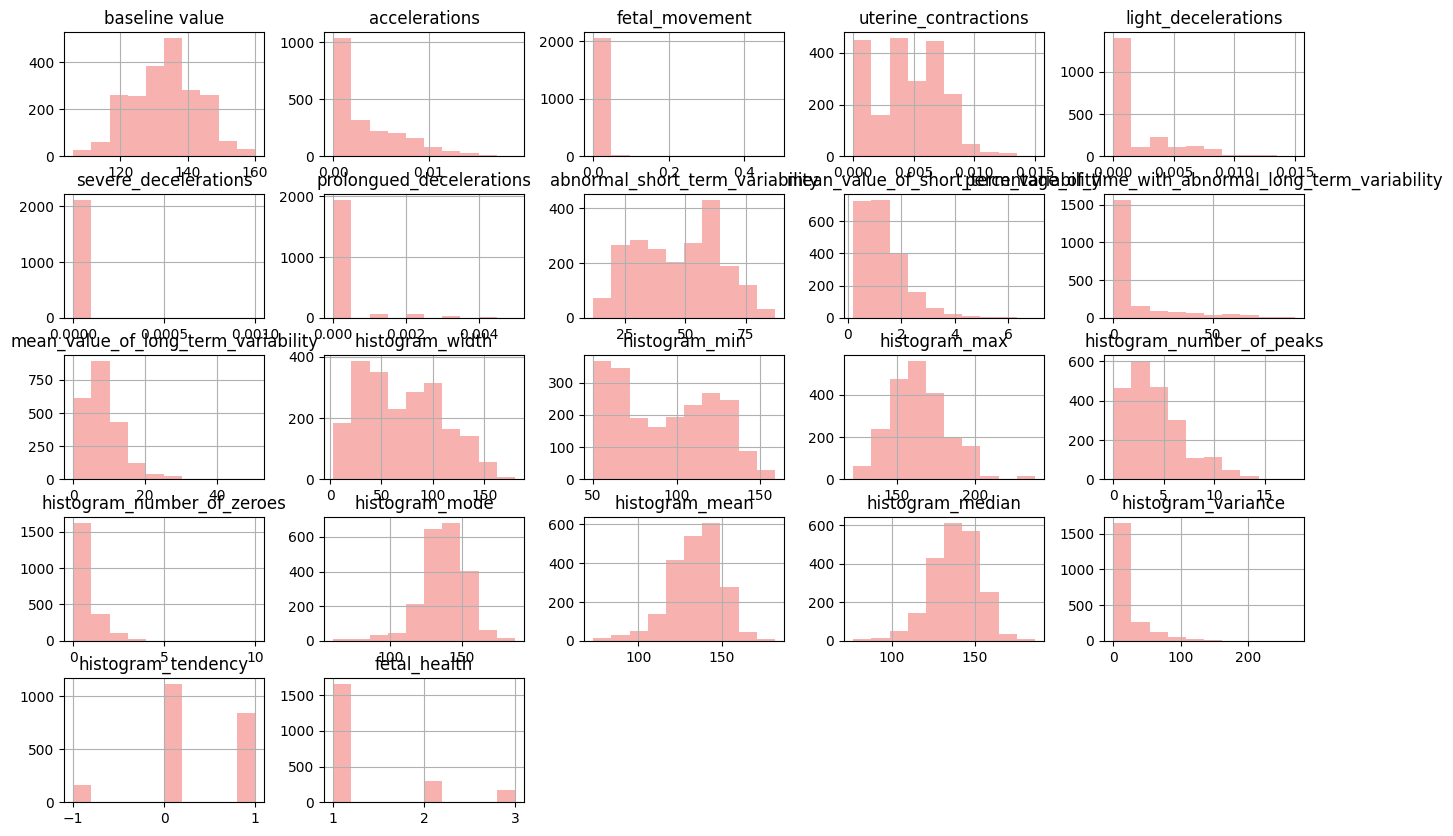

In [11]:
 # plotting distribution of all the columns using histplot
histplot=df.hist(figsize=(16,10), color='#f7b2b0')
histplot

we can see most of the plots are skewed and need to be treated. Some are more skewed than others. 

C:\Users\Shruti\AppData\Local\Temp\ipykernel_17152\3797403231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fetal_health', palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

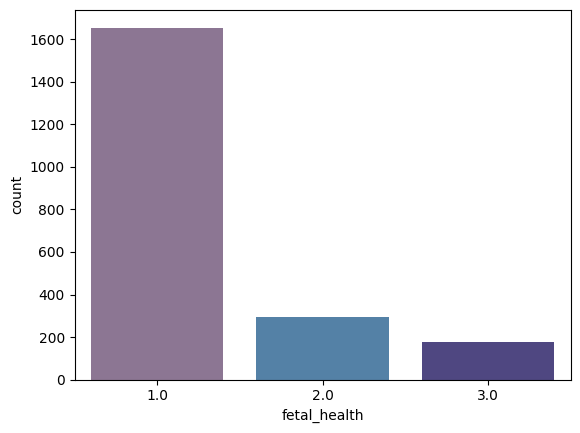

In [13]:
# visualising the target variable
colours=["#8f7198", "#4682B4", "#483D8B"]
sns.countplot(data=df, x='fetal_health', palette=colours)


We see that our target variable is imbalanced therefore we cannot rely on accuracy. we will have to look at other metrics to evaluate our models

<Axes: >

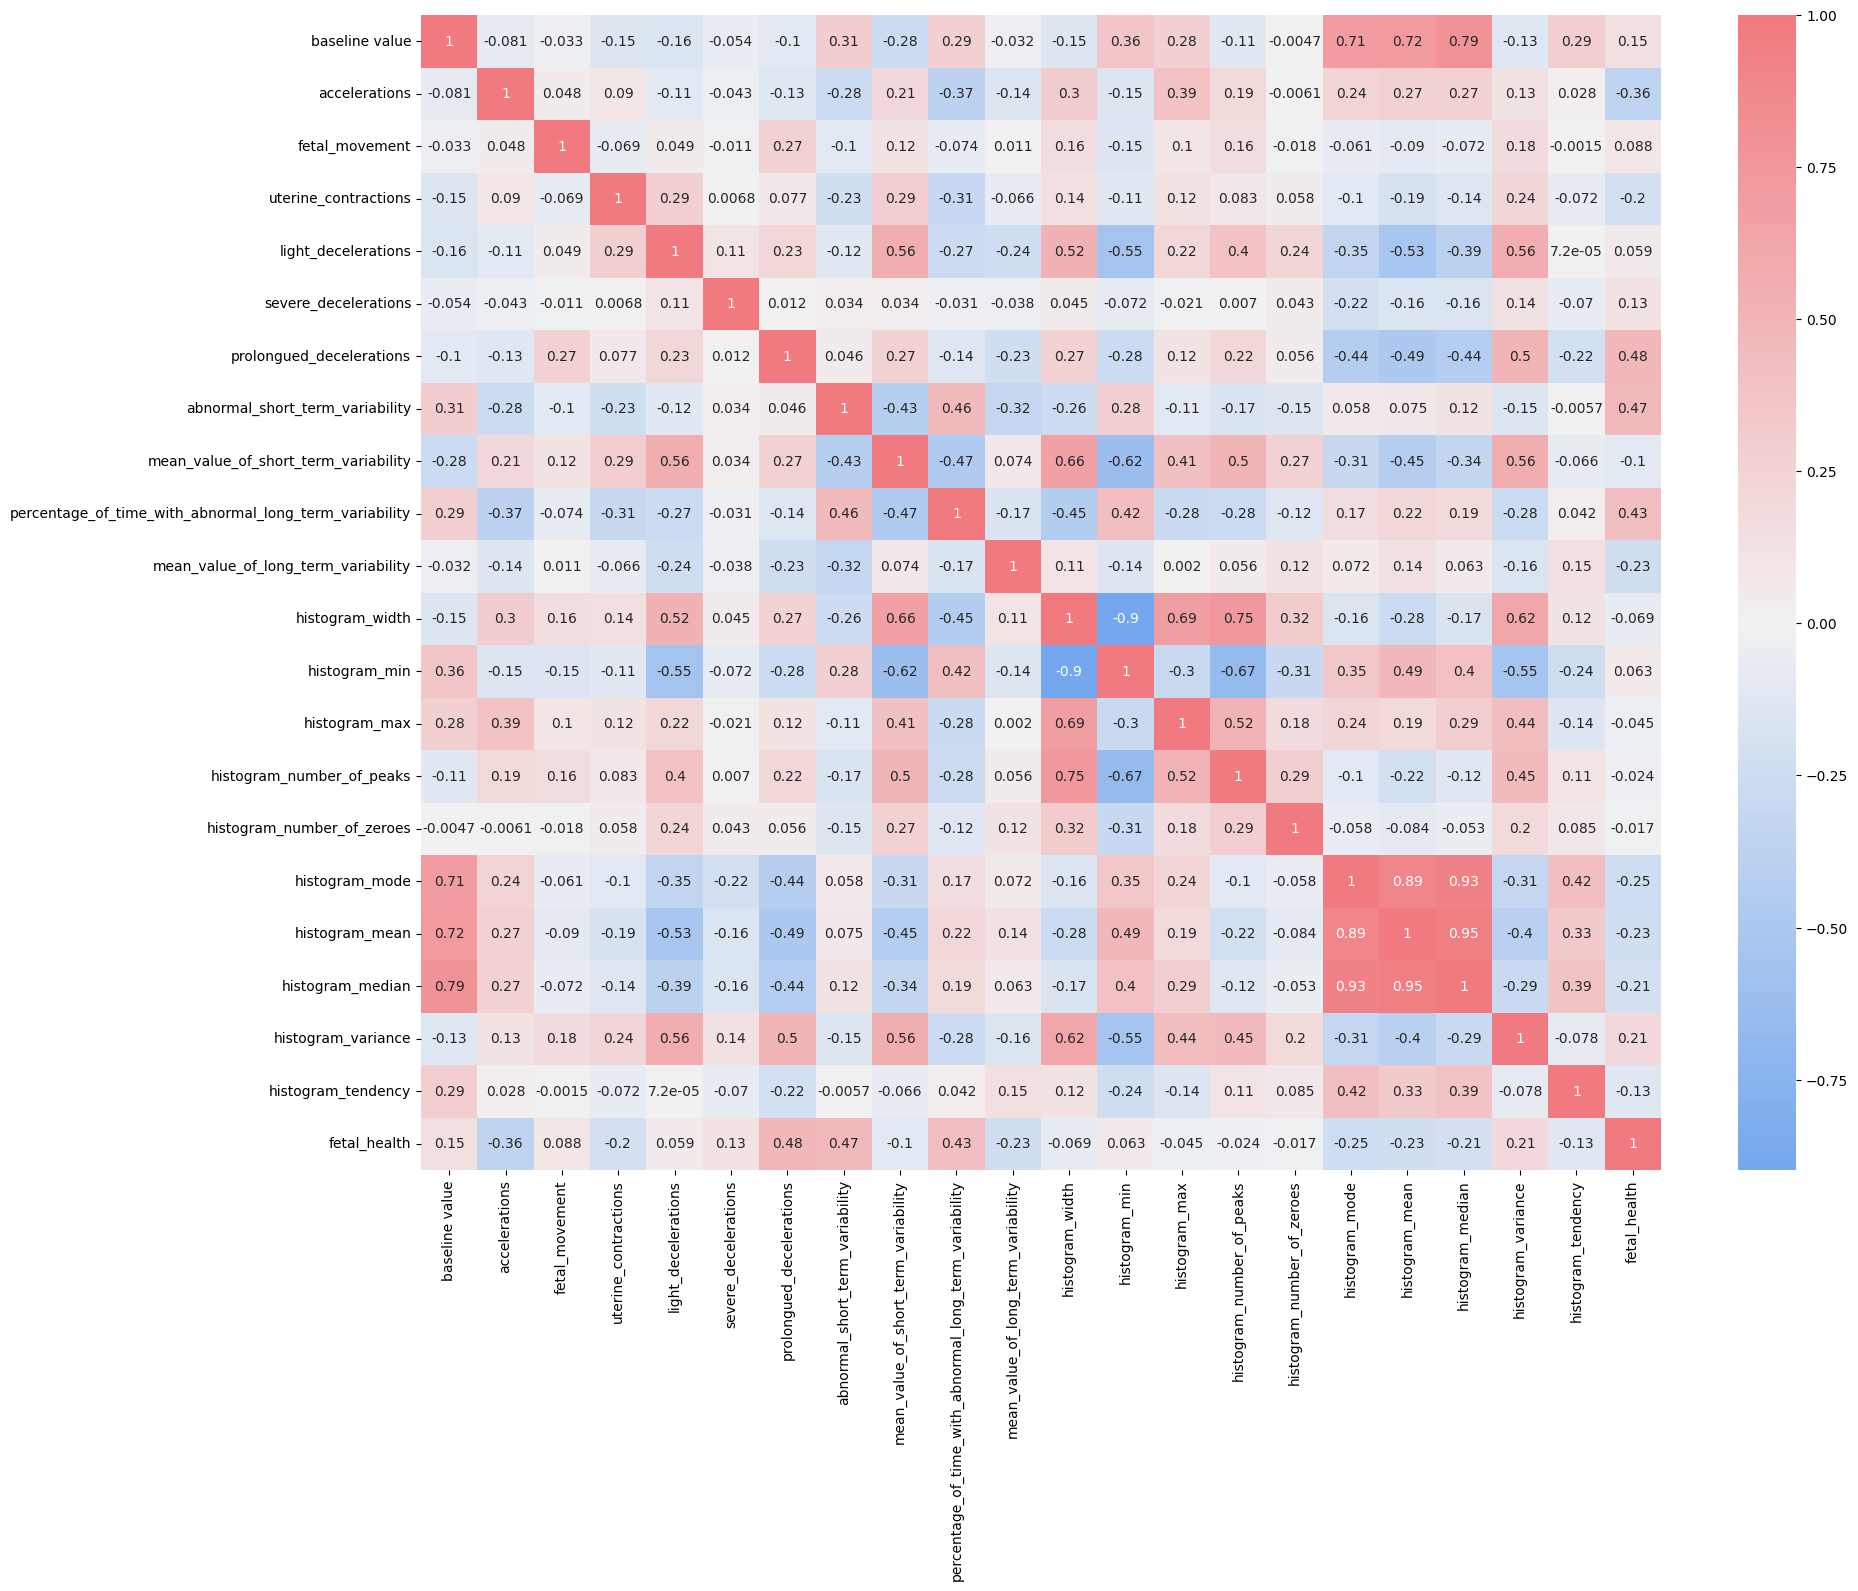

In [16]:
# Plotting a correlation matrix

corrmat=df.corr()
plt.figure(figsize=(20,15))

cmap = sns.diverging_palette(250, 10, s=80, l=65, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [18]:
# Using UDF to find correlated features
def find_corr(df, upper_limit, lower_limit):
    """This function finds and returns features with correlation within upper and lower limits

    Args:
        df (pd.DataFrame): dataset that contains the features
        upper_limit (float): for finding very high correlated features
        lower_limit (float): for finding very low correlated features
    """
    corr_matrix=df.corr()
    high_corr_features=[]
    low_corr_features=[]

    for col in corr_matrix.columns:
        # Exclude correlation with own self coz default value is 1
        corr_values=corr_matrix[col].drop(index=col)

        # Find features with high correlation
        if any(corr_values.abs()> upper_limit):
            high_corr_features.append(col)
        
        elif all(corr_values.abs()< lower_limit):
            low_corr_features.append(col)
    return high_corr_features, low_corr_features


In [20]:
upper_limit=0.85
lower_limit=0.10

find_corr(df, 0.85,0.10)

(['histogram_width',
  'histogram_min',
  'histogram_mode',
  'histogram_mean',
  'histogram_median'],
 [])

Features that show more than 85% correlation are: <br>
Features that show less than 10% correlation are:

In our dataset, outliers will not be removed as they are not result of error by an outcome of the CTG report itself. 